<a href="https://colab.research.google.com/github/tushaar82/backtest-using-pyfolio-/blob/master/backtrader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Backtradert with logs and pyfolio, Simple RSI Strategy**

--------------------------------  STRATEGY INIT  --------------------------------
--------------------------------  NOTIFY ORDER  --------------------------------
Order Accepted
2018-12-11, Status 2: Ref: 5605, Size: 318.2686065588056, Price: NA
--------------------------------  NOTIFY ORDER  --------------------------------
Order Accepted
2018-12-11, Status 2: Ref: 5606, Size: -318.2686065588056, Price: 137.10001
--------------------------------  NOTIFY ORDER  --------------------------------
Order Accepted
2018-12-11, Status 2: Ref: 5607, Size: -318.2686065588056, Price: 159.10001
--------------------------------  NOTIFY ORDER  --------------------------------
Order Completed
2018-12-11, Status 4: Ref: 5605, Size: 318.2686065588056, Price: NA
Created: 2018-12-10 00:00:00 Price: 157.100006 Size: 318.2686065588056
--------------------------------------------------------------------------------
--------------------------------  NOTIFY ORDER  --------------------------------
Order Comple

Start date,2018-10-17
End date,2019-10-17
Total months,11
,Backtest
Annual return,24.0%
Cumulative returns,23.1%
Annual volatility,18.8%
Sharpe ratio,1.24
Calmar ratio,1.95
Stability,0.85
Max drawdown,-12.4%


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,12.35,2019-08-20,2019-08-22,2019-09-11,17
1,1.60,2019-06-27,2019-06-28,2019-07-01,3
2,0.45,2019-08-16,2019-08-19,2019-08-20,3
3,0.22,2019-05-24,2019-05-27,2019-05-28,3
4,0.00,2018-10-17,2018-10-17,2018-10-17,1


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


Stress Events,mean,min,max
New Normal,0.09%,-8.56%,8.80%


Top 10 long positions of all time,max
Data0,99.97%


Top 10 short positions of all time,max


Top 10 positions of all time,max
Data0,99.97%


----------------------------------------------FINAL PORTFOLIO VALUE-------------------
Final Portfolio Value: $61545.873156803544
P/L: $11545.873156803544


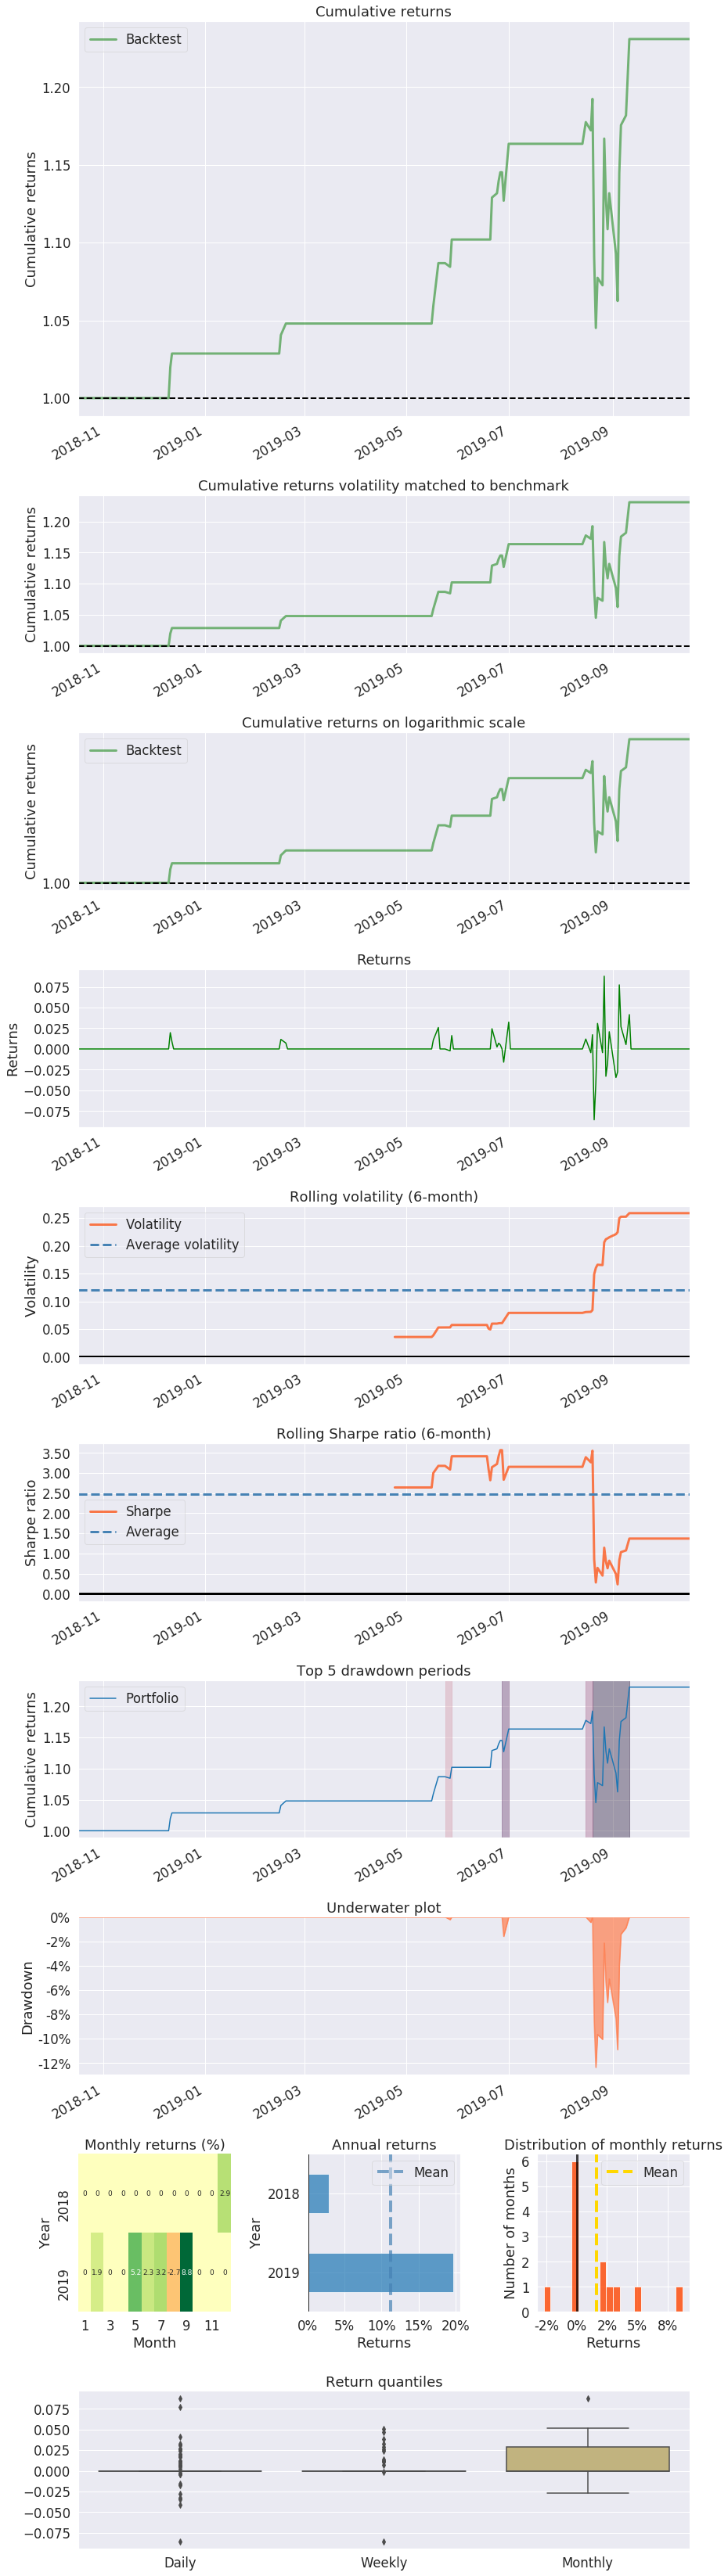

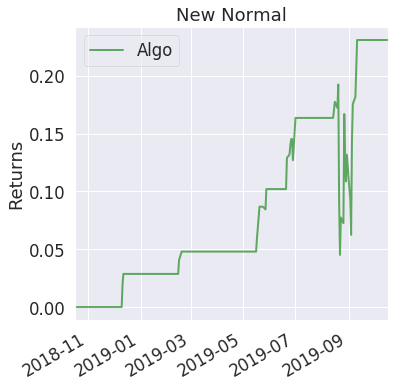

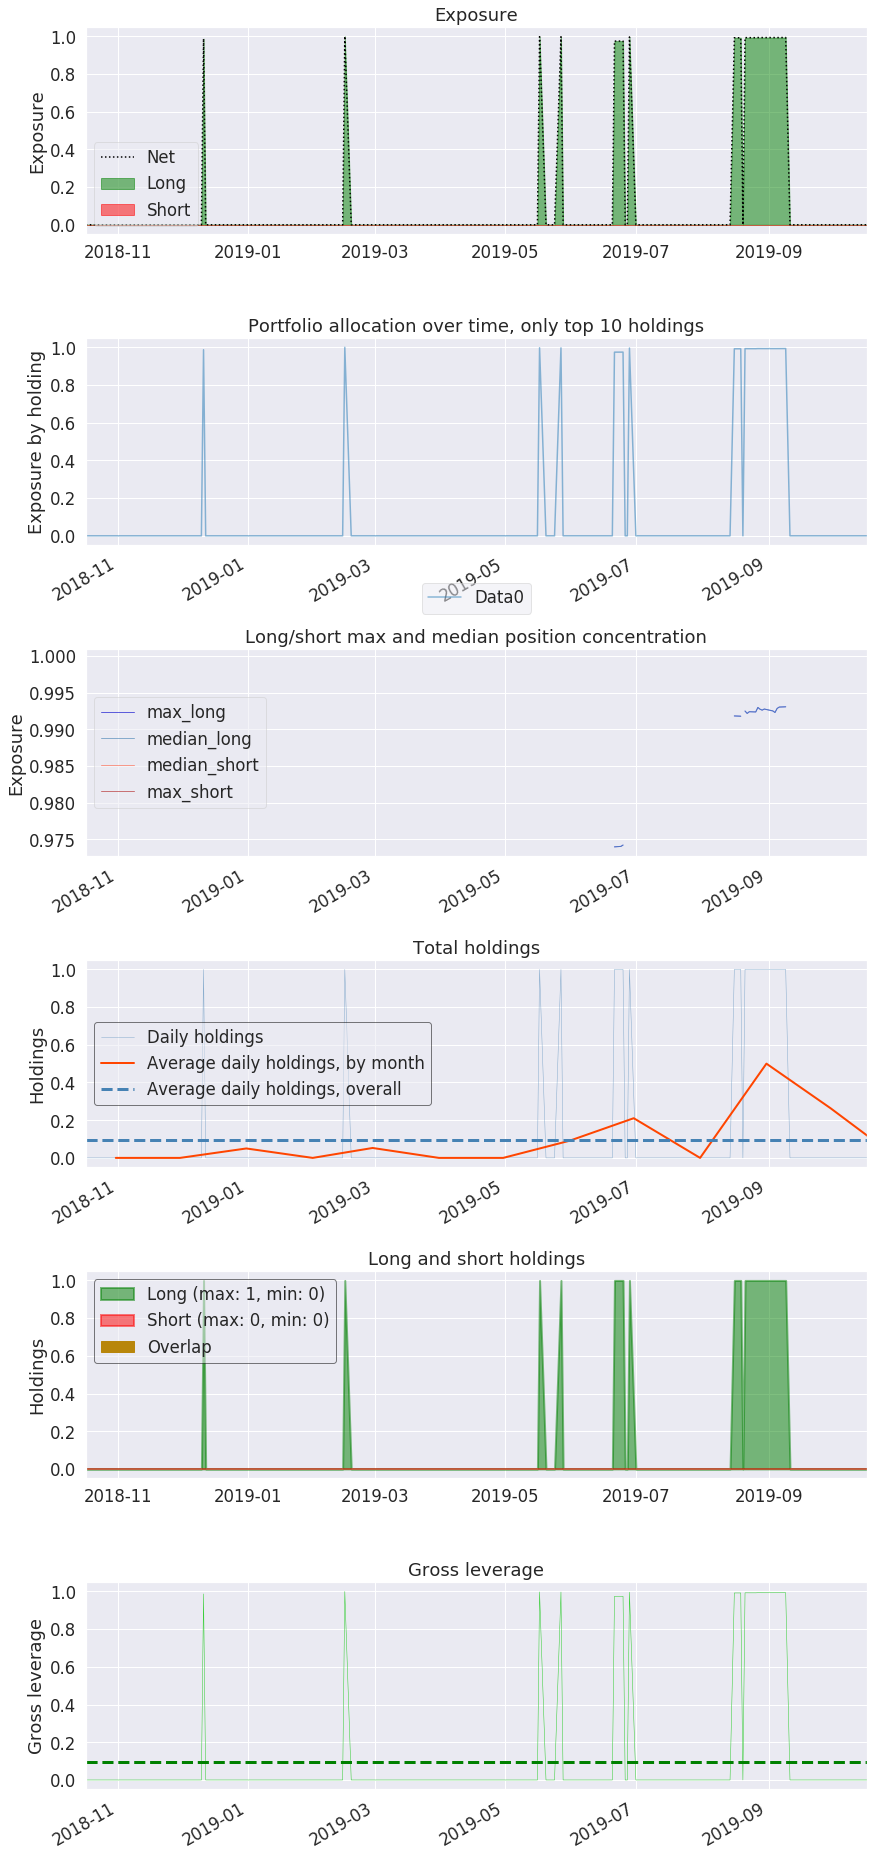

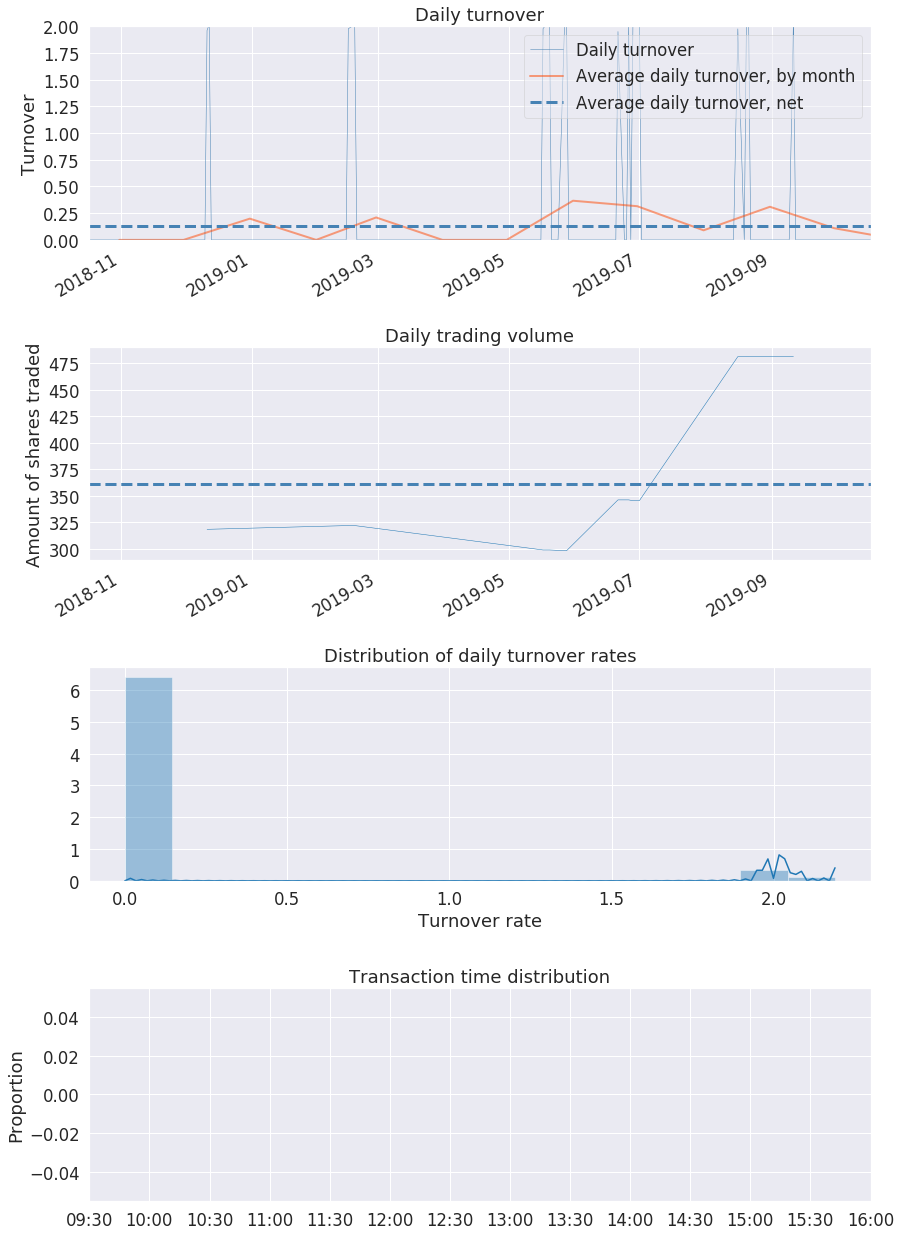

In [48]:


from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])
import matplotlib
import pyfolio as pf
import backtrader as bt
import pandas as pd
import backtrader.feeds as btfeeds
import backtrader.analyzers as btanalyzers

class TestStrategy(bt.Strategy):

    params = (('percents', 0.9),) # Float: 1 == 100%

    def __init__(self):
        print('-'*32,' STRATEGY INIT ','-'*32)
        self.rsi = bt.indicators.RSI_SMA(self.data.close, period=21)

    def next(self):
        date = self.data.datetime.date()
        close = self.data.close[0]

        #print('{}: Close: ${}, Position Size: {}'.format(date, close, self.position.size))

        if not self.position:
            long_tp = close + 2
            long_stop = close - 20
            
            short_tp = close - 2
            short_stop = close + 20
            equity = cerebro.broker.getvalue()
            stocksize = equity/close
            
            if self.rsi[-1] < 30:
                # Enter with a market order
                # Place TP at 50 dollars above
                buy_ord = self.buy_bracket(limitprice=long_tp, stopprice=long_stop, exectype=bt.Order.Market,size = stocksize)
               
            if self.rsi[-1] > 70:
                # Enter with a market order
                # Place TP at 50 dollars above
                sell_ord = self.sell_bracket(limitprice=short_tp, stopprice=short_stop, exectype=bt.Order.Market,size = stocksize)



    def notify_order(self, order):
        date = self.data.datetime.datetime().date()

        if order.status == order.Accepted:
            print('-'*32,' NOTIFY ORDER ','-'*32)
            print('Order Accepted')
            print('{}, Status {}: Ref: {}, Size: {}, Price: {}'.format(
                                                        date,
                                                        order.status,
                                                        order.ref,
                                                        order.size,
                                                        'NA' if not order.price else round(order.price,5)
                                                        ))


        if order.status == order.Completed:
            print('-'*32,' NOTIFY ORDER ','-'*32)
            print('Order Completed')
            print('{}, Status {}: Ref: {}, Size: {}, Price: {}'.format(
                                                        date,
                                                        order.status,
                                                        order.ref,
                                                        order.size,
                                                        'NA' if not order.price else round(order.price,5)
                                                        ))
            print('Created: {} Price: {} Size: {}'.format(bt.num2date(order.created.dt), order.created.price,order.created.size))
            print('-'*80)

        if order.status == order.Canceled:
            print('-'*32,' NOTIFY ORDER ','-'*32)
            print('Order Canceled')
            print('{}, Status {}: Ref: {}, Size: {}, Price: {}'.format(
                                                        date,
                                                        order.status,
                                                        order.ref,
                                                        order.size,
                                                        'NA' if not order.price else round(order.price,5)
                                                        ))

        if order.status == order.Rejected:
            print('-'*32,' NOTIFY ORDER ','-'*32)
            print('WARNING! Order Rejected')
            print('{}, Status {}: Ref: {}, Size: {}, Price: {}'.format(
                                                        date,
                                                        order.status,
                                                        order.ref,
                                                        order.size,
                                                        'NA' if not order.price else round(order.price,5)
                                                        ))
            print('-'*80)

    def notify_trade(self, trade):
        date = self.data.datetime.datetime()
        if trade.isclosed:
            print('-'*32,' NOTIFY TRADE ','-'*32)
            print('{}, Close Price: {}, Profit, Gross {}, Net {}'.format(
                                                date,
                                                trade.price,
                                                round(trade.pnl,2),
                                                round(trade.pnlcomm,2)))
            print('-'*80)

startcash = 50000

#Create an instance of cerebro
cerebro = bt.Cerebro()


#Add our strategy
cerebro.addstrategy(TestStrategy)
cerebro.addobserver(bt.observers.DrawDown)
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')

# Create a Data Feed
datapath = ('TATAMOTORS.csv')
    # Create a Data Feed
dataframe = pd.read_csv(datapath,parse_dates=True,
                                index_col=0)
data = bt.feeds.PandasData(dataname=dataframe)

# Add the data
cerebro.adddata(data)

# Set our desired cash start
cerebro.broker.setcash(startcash)

# Run over everything
cerebro.run()

#Get final portfolio Value
portvalue = cerebro.broker.getvalue()
pnl = portvalue - startcash


results = cerebro.run()
strat = results[0]    
pyfoliozer = strat.analyzers.getbyname('pyfolio')
returns, positions, transactions,tushar = pyfoliozer.get_pf_items()
pf.create_full_tear_sheet(returns,positions=positions,transactions=transactions,round_trips=False)

print('----------------------------------------------FINAL PORTFOLIO VALUE-------------------')

#Print out the final result
print('Final Portfolio Value: ${}'.format(portvalue))
print('P/L: ${}'.format(pnl))
